# 从头构建一个模型
主要参考于[DeepLearning.ai课程](https://github.com/lmoroney/dlaicourse)

## 1.加载数据

以下python代码将使用OS库来使用操作系统库，从而使您可以访问文件系统，并使用zipfile库来解压缩数据

In [14]:
import os
import zipfile

local_zip = 'tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/horse-or-human')
zip_ref.close()

**代码作用：**压缩包的内容被解压缩到基目录/tmp/horse-or-human，每个基目录依次包含horse和human子目录。也即：可以用于告诉神经网络模型“这就是马的样子”，“这就是人的样子”等的数据。

**注：**此案例中，我们没有将图像明确标记为马或人。 如果您还记得前面的手写示例，我们将其明确标记为“这是1”，“这是7”等。稍后，您将看到正在使用的称为ImageGenerator的东西，它被编码为从子目录读取图像， 并从该子目录的名称中自动标记它们。 因此，例如，您将拥有一个“训练集”目录，其中包含一个“马”目录和一个“人”目录。 ImageGenerator将为您适当地标记图像，从而减少了编码步骤。

In [33]:
# 定义标签目录
train_horse_dir = os.path.join('tmp/horse-or-human/horses')
train_human_dir = os.path.join('tmp/horse-or-human/humans')
print(train_horse_dir)

tmp/horse-or-human/horses


In [35]:
# 看看马和人训练目录中的文件名是什么样子的
# train_horse_names = os.listdir('tmp/hotse-or-human/horses')
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [37]:
# 计算出目录中马和人图像的总数
print("训练集中马图片的数量：",len(os.listdir(train_horse_dir)))
print("训练集中人图片的数量：",len(os.listdir(train_human_dir)))

训练集中马图片的数量： 500
训练集中人图片的数量： 527


['tmp/horse-or-human/horses\\horse01-0.png', 'tmp/horse-or-human/horses\\horse01-1.png', 'tmp/horse-or-human/horses\\horse01-2.png', 'tmp/horse-or-human/horses\\horse01-3.png', 'tmp/horse-or-human/horses\\horse01-4.png', 'tmp/horse-or-human/horses\\horse01-5.png', 'tmp/horse-or-human/horses\\horse01-6.png', 'tmp/horse-or-human/horses\\horse01-7.png']
0 tmp/horse-or-human/horses\horse01-0.png
1 tmp/horse-or-human/horses\horse01-1.png
2 tmp/horse-or-human/horses\horse01-2.png
3 tmp/horse-or-human/horses\horse01-3.png
4 tmp/horse-or-human/horses\horse01-4.png
5 tmp/horse-or-human/horses\horse01-5.png
6 tmp/horse-or-human/horses\horse01-6.png
7 tmp/horse-or-human/horses\horse01-7.png
8 tmp/horse-or-human/humans\human01-00.png
9 tmp/horse-or-human/humans\human01-01.png
10 tmp/horse-or-human/humans\human01-02.png
11 tmp/horse-or-human/humans\human01-03.png
12 tmp/horse-or-human/humans\human01-04.png
13 tmp/horse-or-human/humans\human01-05.png
14 tmp/horse-or-human/humans\human01-06.png
15 tm

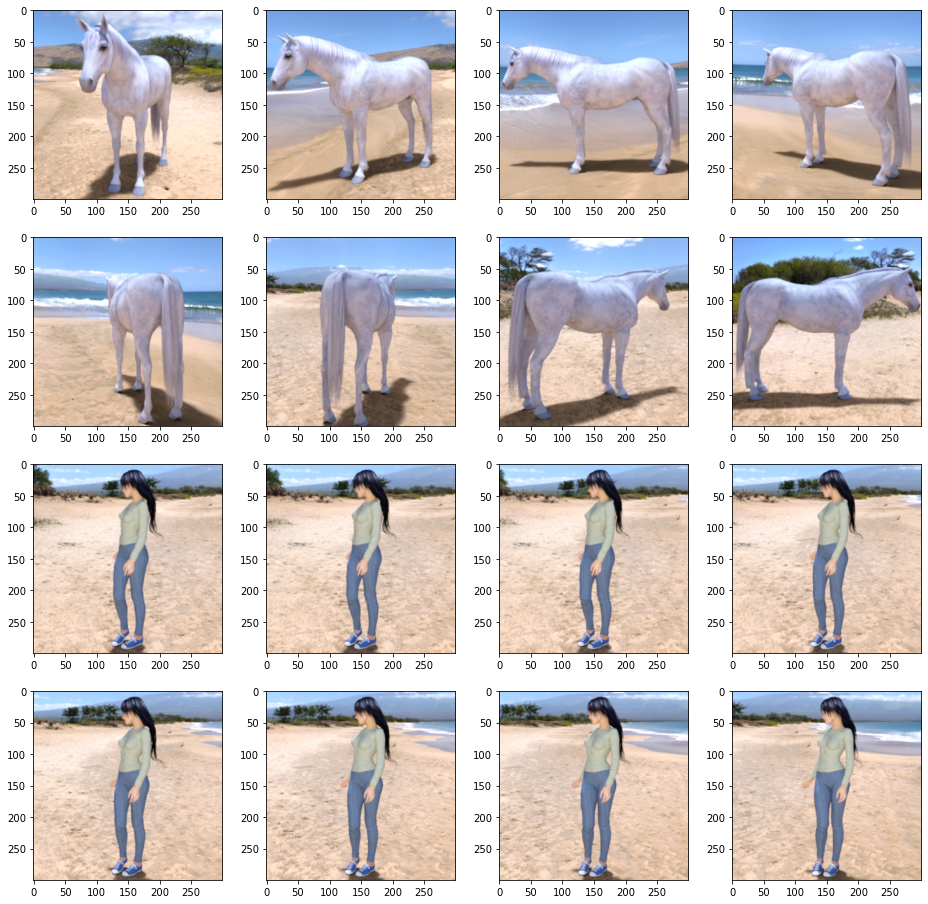

In [44]:
# 显示一些图片，以更好地了解它们的外观。 

# 首先，配置matplot参数：
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

# 获取当前图表
fig = plt.gcf()
# 使用plt.gca()获取当前子图

# 设置图表大小
fig.set_size_inches(ncols*4,nrows*4)

pic_index +=8

# 获取图片的路径
next_horse_pix = [os.path.join(train_horse_dir,fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]

print(next_horse_pix)
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]


# enumerate():将对象(如列表、元组或字符串)组合为一个索引序列：（索引，对象）
for i, img_path in enumerate(next_horse_pix+next_human_pix):
    print(i,img_path)
    # 获得第i+1个子图
    sp = plt.subplot(nrows, ncols, i + 1)
    # sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

## 2. 从头构建模型
导入tensorflow库，然后像前面的例子一样添加卷积层，并将最终结果展平，然后把数据传递到后面的全连接层。

**注：**
* 由于面临的是两类分类问题，即二进制分类问题，因此我们将以Sigmoid激活函数来结束网络，因此网络的输出将是介于0和1之间的单个标量，从而对当前图像分辨是1类（而不是0类）。

In [47]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # 输入图片形状：(300,300,3)
    # 第一层
    tf.keras.layers.Conv2D(16, (3,3),activation = 'relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # 第二层
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 第三层
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 第四层
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 展平数据
    tf.keras.layers.Flatten(),
    # 隐藏层
    tf.keras.layers.Dense(512, activation = 'relu'),
    # 输出层
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

In [48]:
# 查看模型各层参数
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

“Output Shape”一栏显示了feature map在每一层中的大小变化。由于填充，卷积层减少了一点特征映射的大小，而每个池化层将尺寸减半。

接下来，我们将配置模型训练的规范：将使用binary_crossentropy损失训练模型，因为这是一个二进制分类问题，而我们的最终激活是Sigmoid。 （有关损耗度量的更新，请參阅：[Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture)）我们将使用RMSprop优化器，其学习率为0.001。 在训练期间，我们可以观察分类的准确性。

**注：**
* 在这种情况下，使用RMSprop优化算法比使用随机梯度下降（SGD）更可取，因为RMSprop可自动为我们调整学习速率。 （其他优化器，例如Adam和Adagrad，也会在训练过程中自动调整学习率，并且在这里同样可以很好地发挥作用。）

In [50]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

## 3. 数据预处理
我们将建立数据生成器，它将读取源文件夹中的图片，将它们转换为float32张量，并将它们(带有标签)提供给我们的网络。所以将有一个用于训练集图像的生成器和一个用于验证集图像的生成器。我们的生成器将生成大小为300x300的成批图像及其标签(二进制)。

并且通常应该以某种方式规范化进入神经网络的数据，以使其更易于被网络处理。(将原始像素输入卷积神经网络是很少见的。)在本例中，我们将对图像进行预处理，将像素值归一化为[0,1]范围(最初所有值都在[0,255]范围内)。

在Keras中，这可以通过keras.preprocessing.image.ImageDataGenerator类使用rescale参数来完成均值归一化。 这个ImageDataGenerator类允许您通过.flow（数据，标签）或.flow_from_directory（目录）实例化增强图像批处理（及其标签）的生成器。 然后，这些生成器可以与Keras模型方法一起使用，如：fit，evaluate_generator和predict_generator。

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 进行图像预处理
train_datagen = ImageDataGenerator(rescale = 1 / 255)

# 以128的小批量生成训练集数据
train_generator = train_datagen.flow_from_directory(
    'tmp/horse-or-human/',# 训练集数据的源目录
    target_size = (300,300), # 所有图片将被裁剪成150*150
    batch_size = 128,
    class_mode='binary' # 由于使用的是binary_crossentropy损失，所以使用二进制标签(二分类)
)

Found 1027 images belonging to 2 classes.


## 4. 训练模型
损失和准确性是训练进度的重要标志。 它正在猜测训练数据的分类，然后根据已知标签对其进行测量，然后计算结果。 准确性是正确猜测的一部分。

In [53]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    verbose = 1
)

  ...
    to  
  ['...']
Train for 8 steps
Epoch 1/15
8/8 [==============================] - 69s 9s/step - loss: 1.8159 - accuracy: 0.5150
Epoch 2/15
8/8 [==============================] - 74s 9s/step - loss: 0.4894 - accuracy: 0.7964
Epoch 3/15
8/8 [==============================] - 69s 9s/step - loss: 0.7267 - accuracy: 0.7709
Epoch 4/15
8/8 [==============================] - 70s 9s/step - loss: 0.9264 - accuracy: 0.8454
Epoch 5/15
8/8 [==============================] - 81s 10s/step - loss: 0.2579 - accuracy: 0.8877
Epoch 6/15
8/8 [==============================] - 83s 10s/step - loss: 0.0776 - accuracy: 0.9744
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.0629 - accuracy: 0.9744
Epoch 8/15
8/8 [==============================] - 75s 9s/step - loss: 0.4461 - accuracy: 0.8343
Epoch 9/15
8/8 [==============================] - 84s 11s/step - loss: 0.0485 - accuracy: 0.9873
Epoch 10/15
8/8 [==============================] - 83s 10s/step - loss: 0.0470 - accuracy

## 5. 预测评估模型
现在让我们看看如何使用模型实际运行预测。这段代码允许您从文件系统中选择1个或多个文件，然后它将加载这些文件，并在模型中运行它们，给出对象是马还是人的指示

In [62]:
import numpy as np
from keras.preprocessing import image

fn = 'myimage/2.jpg'
path = 'tmp/' + fn
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn + " is a human")
else:
    print(fn + " is a horse")

[0.]
myimage/2.jpg is a horse


## 6. 可视化中间层
要想了解我们的卷积神经网络学到了什么特征，一件有趣的事情是去想象输入在经过卷积神经网络时是如何转换的。

让我们从训练集中选择一个随机图像，然后生成一个图形，其中每一行都是每一层的输出，而行中的每一幅图像都是该输出要素图中的特定过滤器。 重新运行此单元格以生成各种训练图像的中间表示。

d:\dl\minconda3\envs\ml_dl_andrewng\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


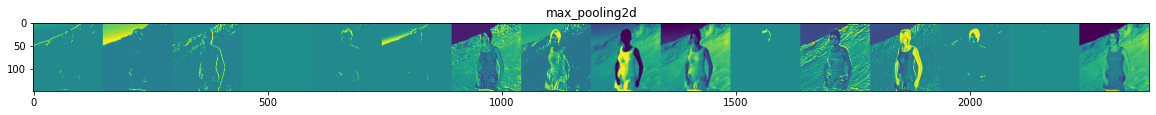

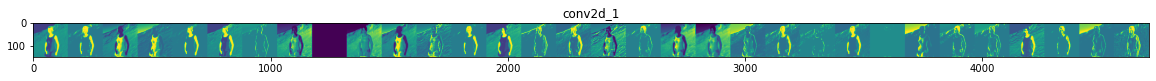

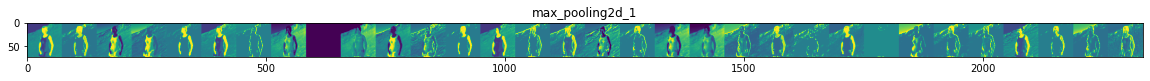

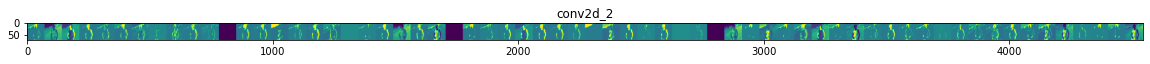

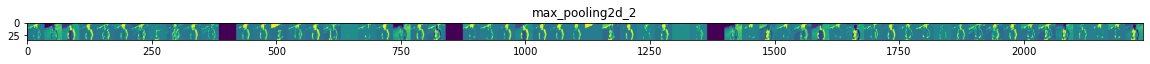

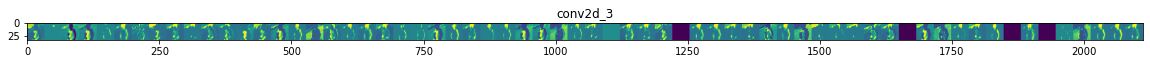

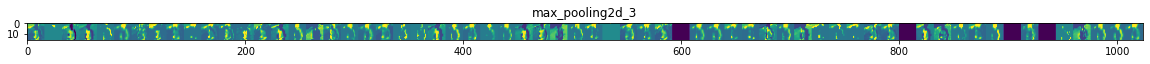

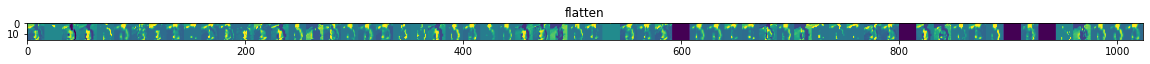

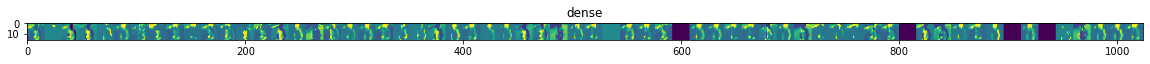

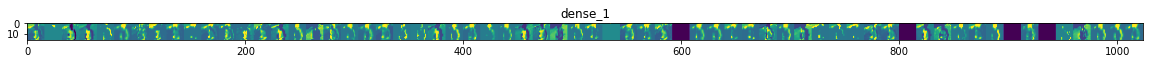

In [67]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs=model.input, outputs = successive_outputs)

# 随机选择训练集
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

# 加载数据
img = load_img(img_path, target_size = (300,300))
x = img_to_array(img)
# (1,150,150,3)
x = x.reshape((1,)+x.shape)

# 数据预处理
x /= 255

successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #只有卷积层和池化层，没有全连接层
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
          x = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std()
          x *= 64
          x += 128
          x = np.clip(x, 0, 255).astype('uint8')
          # We'll tile each filter into this big horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

正如你所看到的，我们从原始像素的图像到越来越抽象和紧凑的表示。下面的图像表示开始突出显示网络关注的内容，它们显示的被“激活”的特性越来越少;大多数设置为零。这就是所谓的“稀疏性”。表示稀疏性是深度学习的一个关键特征。

随着卷积层的不断卷积，图像携带越来越少的关于图像原始像素的信息，但越来越精细的关于图像的类的信息。您可以将convnet(通常称为深度网络)视为信息蒸馏管道。



## 7.清空内存(也许是Colab专用代码)
在运行下一个练习之前，运行以下单元以终止内核并释放内存资源

In [70]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

AttributeError: module 'signal' has no attribute 'SIGKILL'